In [1]:
import numpy as np

train = np.load('data/cleaned_train.npy')
label = np.load('data/cleaned_label.npy')

In [2]:
# correlation matrix

import pandas as pd
pd_train_label = pd.DataFrame({
    'pickup_datetime': train[:, 0],
    'dropoff_datetime': train[:, 1],
    'passenger_count': train[:, 2],
    'pickup_longitude': train[:, 3],
    'pickup_latitude': train[:, 4],
    'dropoff_longitude': train[:, 5],
    'dropoff_latitude': train[:, 6],
    'distance': train[:, 7],    
    'trip_duration': label,
})

corr_matrix = pd_train_label.corr()
corr_matrix["trip_duration"].sort_values(ascending=False)

trip_duration        1.000000
distance             0.094777
pickup_longitude     0.026542
dropoff_longitude    0.014678
passenger_count      0.008471
dropoff_datetime     0.007819
pickup_datetime      0.006644
dropoff_latitude    -0.020677
pickup_latitude     -0.029204
Name: trip_duration, dtype: float64

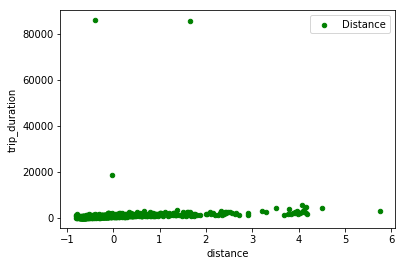

In [3]:
%matplotlib inline
pd_train_label.sample(1000).plot(kind="scatter", x="distance", y="trip_duration", color='g', label="Distance")

In [4]:
# we definitely have to clean up the outliers
# cleaned data w/out outliers
data_no_outlier = np.load('data/cleaned_data_no_outliers.npy')
train_no_outlier = data_no_outlier[:, :-1]
label_no_outlier = data_no_outlier[:, -1]

pd_train_label_no_outlier = pd.DataFrame({
    'pickup_datetime': train_no_outlier[:, 0],
    'dropoff_datetime': train_no_outlier[:, 1],
    'passenger_count': train_no_outlier[:, 2],
    'pickup_longitude': train_no_outlier[:, 3],
    'pickup_latitude': train_no_outlier[:, 4],
    'dropoff_longitude': train_no_outlier[:, 5],
    'dropoff_latitude': train_no_outlier[:, 6],
    'distance': train_no_outlier[:, 7],    
    'trip_duration': label_no_outlier,
})

corr_matrix = pd_train_label_no_outlier.corr()
corr_matrix["trip_duration"].sort_values(ascending=False)

trip_duration        1.000000
distance             0.641120
dropoff_datetime     0.058911
pickup_datetime      0.058818
passenger_count      0.022368
dropoff_longitude   -0.036702
pickup_longitude    -0.054065
pickup_latitude     -0.059290
dropoff_latitude    -0.095687
Name: trip_duration, dtype: float64

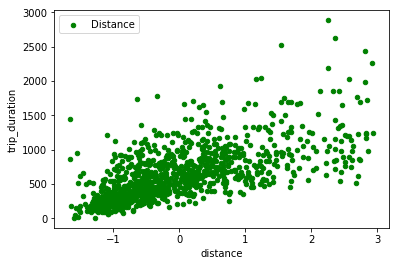

In [5]:
pd_train_label_no_outlier.sample(1000).plot(kind="scatter", x="distance", y="trip_duration", color='g', label="Distance")

In [7]:
# cross-validation with the data with outliers

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, train, label, scoring="neg_mean_squared_error", cv=10)
line_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

display_scores(line_rmse_scores)

/Users/kyu/.pyenv/versions/3.6.2/envs/kaggle-nyc-taxi-3.6.2/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Scores: [ 23.11952293  31.21212098  28.40629156  31.28416446  29.91153327
  32.62640354  22.61258812  35.26498824  28.27809505  28.24960546]
Mean: 29.0965313607
Standard Deviation: 3.74252917386


In [8]:
# cross-validation with the data without outliers
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, train_no_outlier, label_no_outlier, scoring="neg_mean_squared_error", cv=10)
line_rmse_scores = np.sqrt(-scores)

display_scores(line_rmse_scores)

Scores: [ 15.75709964  22.28282809  24.91154985  29.47545899  24.91224642
  33.42285337  15.75591396  29.47629252  29.47657572  22.28184115]
Mean: 24.77526597
Standard Deviation: 5.62332047487
